
# Metode Komputasi Eksplorasi Menggunakan Python

*Oleh Mark Bakker, TU Delft Belanda.*

*Versi Indonesia disesuaikan oleh Tim ITB dan Tim ITS.*
## Topik Lanjutan Notebook 2: Sistem yang tersusun dari persamaan-persamaan linear

Dalam Notebook ini kita akan mempelajari bagaimana cara membangun dan menemukan solusi dari sistem yang tersusun dari persamaan-persamaan linear. Setelah itu, dengan menggunakan teknik yang sama, kita akan mencoba untuk memecahkan soal-soal Mekanika Tanah.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Membuat dan menemukan solusi dari sebuah sistem yang tersusun dari persamaan-persamaan linear
Sebuah parabola dapat didefinisikan dengan menggunakan tiga buah titik, selama titik-titik tersebut tidak terletak sejajar satu sama lain. Persamaan yang digunakan untuk menyatakan kurva berbentuk parabola adalah $y=ax^2+bx+c$, di mana $a$, $b$, dan $c$ berlaku sebagai konstanta. Sebutlah terdapat tiga buah titik; $(x_1,y_1)$, $(x_2,y_2)$, dan $(x_3,y_3)$. Dari sini kita dapat membuat sebuah sistem dengan tiga persamaan linear sebagai berikut:

$
\begin{split}
x_1^2a+x_1b+c&=y_1 \\
x_2^2a+x_2b+c&=y_2 \\
x_3^2a+x_3b+c&=y_3 \\
\end{split}
$

Bentuk matriks dari sistem di atas adalah:

$
\left(
\begin{array}{ccc}
x_1^2 & x_1 & 1 \\
x_2^2 & x_2 & 1 \\
x_3^2 & x_3 & 1 \\
\end{array}
\right)
\left(
\begin{array}{c}
a \\b \\c \\
\end{array}
\right)
=
\left(
\begin{array}{c}
y_1 \\
y_2 \\
y_3 \\
\end{array}
\right)
$

Untuk menemukan solusi dari soal di atas, langkah pertama adalah untuk membuat sebuah array 2 dimensi yang mengandung nilai dari matriks sistem, beri nama array ini `A`, dan sebuah array 1 dimensi yang mengandung nilai dari variabel-variabel yang terletak di sisi paling kanan, beri nama `rhs`. 

Mari kita terapkan langkah pertama tersebut pada tiga titik berikut:
$(x_1,y_1)=(-2,2)$, $(x_2,y_2)=(1,-1)$, $(x_3,y_3)=(4,4)$

In [2]:
xp = np.array([-2, 1,4])
yp = np.array([ 2,-1,4])
A = np.zeros((3,3))
rhs = np.zeros(3)
for i in range(3):
    A[i] = xp[i]**2, xp[i], 1  # Menyimpan nilai dari matriks sistem perbaris
    rhs[i] = yp[i]
print('Array A: ')
print(A)
print('rhs: ',rhs)

Array A: 
[[  4.  -2.   1.]
 [  1.   1.   1.]
 [ 16.   4.   1.]]
rhs:  [ 2. -1.  4.]


Solusi dari sistem di atas dapat diperoleh dengan menggunakan fungsi `solve` yang disediakan oleh `linalg`, sebuah sub-paket dari `numpy`. Metode penyelesaian masalah dengan menggunakan fungsi `solve` membutuhkan 2 buah input; satu array 2 dimensi (matriks sistem) dan satu array 1 dimensi (variabel-variabel di sisi kanan). Untuk memastikan apakah fungsi `solve` mengembalikan jawaban yang benar, lakukan operasi perkalian matriks antara array `A` dan solusi yang diperoleh. Operasi perkalian matriks dapat diakses menggunakan paket `numpy` dengan memanggil perintah `dot`. Validasi jawaban juga dapat dilakukan secara langsung dengan menggambar tiga buah titik yang diberikan pada soal di atas dan fungsi parabola yang diberikan sebagai solusi.

solusi adalah [a b c]:  [ 0.44444444 -0.55555556 -0.88888889]
validasi jawaban dengan menggunakan operasi perkalian matriks:  [ 2. -1.  4.]


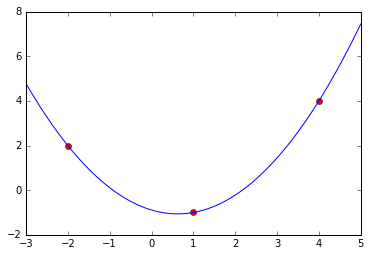

In [4]:
from pylab import *
sol = np.linalg.solve(A,rhs)
print('solusi adalah [a b c]: ', sol)
print('validasi jawaban dengan menggunakan operasi perkalian matriks: ', np.dot(A,sol))
plt.plot([-2,1,4], [2,-1,4], 'ro')
x = np.linspace(-3,5,100)
y = sol[0]*x**2 + sol[1]*x + sol[2]
plt.plot(x,y,'b');

### Latihan 1. <a name="back1"></a> Mencocokkan sebuah kurva berbentuk gelombang
Sebutlah terdapat empat buah hasil pengukuran variabel $y$ pada $t$: $(t_0,y_0)=(0,3)$, $(t_1,y_1)=(0.25,1)$, $(t_2,y_2)=(0.5,-3)$, $(t_3,y_3)=(0.75,1)$. Hasil observasi ini merupakan bagian dari sebuah gelombang yang dapat didefinisikan sebagai berikut:

$y = a\cos(\pi t) + b\cos(2\pi t) + c\cos(3\pi t) + d\cos(4\pi t)$

Di mana $a$, $b$, $c$, dan $d$ adalah parameter. Buatlah sebuah sistem yang terdiri dari empat persamaan linear dan temukan solusi dari parameter $a$, $b$, $c$, dan $d$. Setelah itu buatlah plot dari gelombang di atas pada $t=0$ sampai dengan 1. Tunjukkan empat titik observasi pada soal di atas dalam plot gelombang anda dengan menggunakan penanda titik. 

<a href="#ex1answer">Kunci Jawaban untuk Latihan 1</a>

### Aliran air tanah 1 dimensi
Sebutlah terdapat sebuah lapisan pasir yang terletak di bawah lapisan lempung (*clay*). Terdapat dua buah kanal dengan muka air yang tetap yang terletak di masing-masing sisi dari lapisan pasir tersebut; $h_1^*$ (sisi kiri) dan $h_2^*$ (sisi kanan). Jarak dari kanal 1 ke kanal 2 adalah $L$. Terdapat resapan air dengan laju yang tetap $P$ dari lapisan pasir (lihat gambar). *Head* dari air tanah yang terdapat pada lapisan pasir ini dapat didefinisikan dengan menggunakan persamaan diferensial orde ke dua di bawah ini:

$\frac{\text{d}^2h}{\text{d}x^2} = -\frac{P}{kD}$

Di mana $h$ adalah *head*, $k$ merupakan konduktifitas hidrolik dari lapisan pasir, dan $D$ adalah ketebalan dari lapisan pasir. Kondisi di batas-batas sistem adalah sebagai berikut; $h=h_1^*$ pada $x=0$ dan $h=h_2^*$ pada $x=L$.

<img src="http://i.imgur.com/2DH0sxT.png" alt="Canals" width=400pt>

Meskipun solusi dari contoh soal dapat ditemukan dengan mudah, kita akan mencoba memecahkan sistem ini secara numerik dengan menggunakan metode beda hingga atau *finite difference method*, di mana kita dapat mencari $P$ sebagai fungsi dari $x$. *Head* akan dihitung pada titik-titik yang terdistribusi secara merata sejumlah $N+1$, mulai dari $x=0$ sampai $x=L$. Titik-titik ini akan kita beri label $x_0$ sampai dengan $x_{N}$, di mana $x_n=n\Delta x$ dan $\Delta x$ adalah jarak horizontal di antara titik-titik tersebut. *Head* pada titik $x_n$ disebut dengan $h_n$. Turunan orde ke dua dari sistem ini dapat dihampiri sebagai berikut (lihat, e.g., Verrujt (2012) Soil Mechanics, Eq. 17.4; tautan untuk versi pdf dari dokumen ini dapat ditemukan di bawah tab *Software* [di sini](http://geo.verruijt.net/)):

$\frac{\text{d}^2h}{\text{d}x^2} \approx \frac{1}{\Delta x} \left[ \frac{h_{n+1}-h_n}{\Delta x} - \frac{h_{n}-h_{n-1}}{\Delta x} \right]= \frac{h_{n-1}-2h_n+h_{n+1}}{(\Delta x)^2}$

Gunakan persamaan untuk menghampiri turunan orde ke dua di atas sebagai solusi dari persamaan diferensial yang kita butuhkan untuk sistem air tanah yang sedang kita evaluasi. Atur letak variabel-variabel yang telah diberikan pada soal sehingga membentuk persamaan di bawah ini:

$h_{n-1}-2h_n+h_{n+1} = -P(\Delta x)^2/(kD)$

Persamaan di atas dapat kita gunakan untuk mendefinisikan lokasi tiap titik $n$, kecuali pada titik pertama dan terakhir di mana kita perlu menerapkan kondisi batas yang sesuai:

$h_0=h_1^* \qquad h_N=h_2^*$

Ketika $N=4$, maka kita perlu menemukan solusi dari sebuah sistem yang terdiri dari $N+1=5$ persamaan linear pada $h_0$ sampai $h_4$:

$\begin{split}
h_0 &= h_1^*  \\
h_{0}-2h_1+h_{2} &= -P(\Delta x)^2/(kD) \\
h_{1}-2h_2+h_{3} &= -P(\Delta x)^2/(kD) \\
h_{2}-2h_3+h_{4} &= -P(\Delta x)^2/(kD) \\
h_4 &= h_2^* 
\end{split}$

atau dalam bentuk matriks:

$
\left(
\begin{array}{ccccc}
1 & 0 & 0 & 0 & 0 \\
1 & -2 & 1 & 0 & 0 \\
0 & 1 & -2 & 1 & 0 \\
0 & 0 & 1 & -2 & 1 \\
0 & 0 & 0 & 0 & 1 \\
\end{array}
\right)
\left(
\begin{array}{c}
h_0 \\
h_1 \\
h_2 \\
h_3 \\
h_4 \\
\end{array}
\right)
=
\left(
\begin{array}{c}
h_1^* \\
-P(\Delta x)^2/(kD) \\
-P(\Delta x)^2/(kD) \\
-P(\Delta x)^2/(kD) \\
h_2^* \\
\end{array}
\right)
$

Perhatikan bahwa matriks di atas memiliki banyak nilai 0. Matriks dengan karakteristik seperti ini disebut dengan istilah matriks tri-diagonal, karena nilai yang bukan 0 hanya terletak pada 3 buah diagonal pada matriks. Matriks tri-diagonal ini dapat dibuat dengan secara spesifik menuliskan nilai non-0 pada lokasi-lokasi diagonal yang diinginkan. Letak diagonal utama pada matriks didefinisikan sebagai nomor 0 dan memiliki panjang $N+1$. Posisi dari diagonal yang terletak tepat di atas diagonal utama disebut sebagai nomor $+1$ dengan panjang $N$ dan diagonal yang terletak tepat di bawah diagonal utama memiliki nomor posisi $-1$ dengan panjang yang sama, $N$. Dengan memanggil fungsi `diag` kita dapat menciptakan matriks yang memiliki satu buah diagonal. Argumen input yang diperlukan untuk fungsi ini adalah sebuah array berisi nilai-nilai yang akan ditempatkan pada diagonal dan keterangan berupa nomor posisi dari diagonaltersebut. Contoh dari penggunaan fungsi `diag` untuk menciptakan matriks tri-diagonal dapat dilihat di bawah ini.

In [ ]:
N = 4
d0 = -2*ones(N+1)  # diagonal utama
d0[0] = 1  # nilai pertama pada diagonal utama adalah 1
d0[-1] = 1 # nilai terakhir pada diagonal utama adalah 1
dplus1 = ones(N) # diagonal yang terletak tepat di atas diagonal utama, posisi = +1
dplus1[0] = 0    # nilai pertama pada diagonal +1 adalah 0
dmin1 = ones(N)  # diagonal yang terletak tepat di bawah diagonal utama, posisi = -1
dmin1[-1] = 0    # nilai terakhir dari diaonal -1 adalah 0
A = diag(d0,0) + diag(dplus1,1) + diag(dmin1,-1)
print(A)

Perhatikan bahwa metode beda hingga yang dideskripsikan di atas hanya akan memberikan solusi yang akurat apabila anda menggunakan jumlah titik observasi yang memadai, i.e. empat buah titik tidak cukup. Salah satu cara untuk mengetahui apakah anda sudah menggunakan jumlah titik observasi yang tepat adalah dengan menggandakan jumlah titik observasi yang anda telah tentukan dan membandingkan solusi yang anda peroleh dengan jumlah titik awal dan jumlah titik setelah digandakan. 

### Latihan 2. <a name="back2"></a>*Head* di antara dua buah kanal
Hitunglah distribusi *head* pada sebuah lapisan pasir yang dibatasi oleh dua buah kanal di masing-masing sisi. Diketahui bahwa: $k=10$ m/hari, $D=10$ m, $h_1^*=20$ m, $h_2^*=22$ m, $L=1000$ m, $P=0.001$ m/hari. Gunakan $N=40$. Tulislah kode dalam Python untuk:

* Menemukan *head* di keseluruh $N+1$ titik
* Menampilkan nilai maksimum dari *head* yang terletak di antara dua buah kanal tersebut pada layar komputer anda (apabila kode anda benar maka hasil yang akan diberikan adalah sekitar 22.5)
* Buatlah plot antara *head* vs. $x$ dan berikan label yang sesuai pada masing-masing sumbu

<a href="#ex2answer">Kunci Jawaban untuk Latihan 2</a>

### Konsolidasi
Konsolidasi adalah proses deformasi yang dialami oleh tanah dalam kondisi jenuh. Proses ini merupakan proses yang lambat. Kompresi pada sebuah lapisan tanah akan menyebabkan porositas lapisan tanah tersebut berkurang sehingga ruang yang tersisa di antara partikel-partikel tanah untuk dimasuki oleh air juga akan berkurang. Maka dari itu, untuk mencapai kondisi terkompresi, kandungan air di dalam lapisan tanah harus dikeluarkan terlebih dahulu. Laju proses ini dipengaruhi oleh kondisi permeabilitas dari lapisan tanah yang sedang dievaluasi, e.g. nilai permeabilitas tanah lempung relatif kecil sehingga proses kompresi membutuhkan waktu yang cukup panjang, nilai permeabilitas tanah berpasir relatif lebih besar daripada tanah lempung sehingga waktu yang dibutuhkan akan lebih pendek dibandingkan tanah lempung. Penjelasan yang lebih mendetail dari proses kompresi dapat anda temukan di berbagai literatur, e.g. Bab 15-17 dalam buku Soil Mechanics oleh Verruijt, 2012.

Sebutlah sebuah proses konsolidasi 1 dimensi pada sebuah sampel tanah dengan ketebalan $h$. Tekanan air, $p$, pada sampel tanah ini dapat didefinisikan dengan menggunakan persamaan diferensial di bawah ini:

$\frac{\partial p}{\partial t} = c_v \frac{\partial^2 p}{\partial z^2}$

Di mana $z$ adalah posisi pada sumbu vertikal (titik 0 berada di bagian atas sampel) dan $c_v$ adalah koefisien konsolidasi. Dalam kasus ini, air hanya dapat mengalir keluar dari sistem dari bagian atas sampel tanah namun tidak dari bagian bawah sampel, sehingga kondisi batas pada bagian bawah adalah:

$z=0 \qquad \frac{\partial p}{\partial z} = 0$

Kondisi batas pada bagian atas adalah:

$z=h \qquad p = 0$

Sebuah beban diaplikasikan secara konstan pada bagian atas sampel pada $t=0$ sehingga menghasilkan tekanan yang seragam (*uniform load*) diseluruh penampang sampel tanah:

$t=0 \qquad p = q$

<img src="http://i.imgur.com/4xdeoxw.png" alt="Consolidation" width=400pt>


The change of pressure with time in the soil is simulated with a numerical method (fully implicit finite differences, to be exact). The pressure is computed at $N+1$ points, equally distributed from $z=0$ to $z=h$. The points are labeled $z_0$ through $z_{N}$, where $z_n=n\Delta z$ and $\Delta z$ is the vertical distance between the points. The pressure at point $z_n$ is called $p_n$. A separate solution is computed for every time step $\Delta t$. The time derivative is approximated as

$\frac{\partial p}{\partial t} \approx [p_n(t) - p_n(t-\Delta t)]/\Delta t$

while the spatial derivative is approximated as

$\frac{\partial^2 p}{\partial z^2} \approx [p_{n-1}(t) -2p_n(t) + p_{n+1}(t)] / (\Delta z)^2 $

Subsitution of the approximations of these derivatives and gathering terms gives the following equation:

$p_{n-1}(t) - (2+\mu)p_n(t) + p_{n+1}(t) = -\mu p_n(t-\Delta t)$

where $\mu = (\Delta z)^2/(c_v\Delta t)$. This is an equation for the pressure in points $(n-1)$, $n$, and $(n+1)$ at time $t$, where it is assumed that the pressure at time $t-\Delta t$ is known.

The equations for $n=0$ and $n=N$ are different. 
At the bottom of the sample ($n=0$) the boundary condition is $\partial p/\partial z = 0$. The derivative may be approximated at $z_0=0$ as 

$\left(\frac{\partial p}{\partial z}\right)_{z=0} \approx (p_1-p_{-1})/(2\Delta z)=0$

where $p_{-1}$ is the pressure at an imaginary point $\Delta z$ below $z_0$. The derivative is zero when $p_{-1}=p_1$, and substitution in the equation for $n=0$ gives

$- (2+\mu)p_n(t) + 2p_{n+1}(t) = -\mu p_n(t-\Delta t)$

The equation for $n=N$ is easier, as at the top of the sample ($n=N$) the pressure is fixed to $p_N=0$.

Sebagai contoh, sebuah sistem persamaan-persamaan linear untuk merepresentasikan $N=4$ adalah:

$
\left(
\begin{array}{ccccc}
-(2+\mu) & 2 & 0 & 0 & 0 \\
1 & -(2+\mu) & 1 & 0 & 0 \\
0 & 1 & -(2+\mu) & 1 & 0 \\
0 & 0 & 1 & -(2+\mu) & 1 \\
0 & 0 & 0 & 0 & 1 \\
\end{array}
\right)
\left(
\begin{array}{c}
p_0(t) \\
p_1(t) \\
p_2(t) \\
p_3(t) \\
p_4(t) \\
\end{array}
\right)
=
\left(
\begin{array}{c}
-\mu p_0(t-\Delta t)) \\
-\mu p_1(t-\Delta t)) \\
-\mu p_2(t-\Delta t)) \\
-\mu p_3(t-\Delta t) \\
0 \\
\end{array}
\right)
$

Solusi dari sistem ini dihitung per langkah waktu. Karena nilai dari matriks tidak berubah terhadap waktu maka matriks hanya perlu dihitung satu kali. Sebaliknya, untuk setiap langkah waktu, variabel-variabel yang terletak di sisi sebelah kanan perlu dihitung dan sebuah sistem linear yang terdiri dari $N+1$ persamaan perlu dicari solusinya. Apabila matriks kita beri label $A$ dan kumpulan variabel di sisi kanan (tekanan pada $t-\Delta t$) dilabeli $\vec{r}(t-\Delta t)$, maka tekanan pada $t$, $\vec{p}(t)$, dapat diperoleh dengan mencari solusi dari sistem:

$A\vec{p}(t) = \vec{r}(t-\Delta t)$

Perhatikan bahwa prosedur untuk menghitung solusi numerik di atas merupakan sebuah penghampiran. Metode ini akan memberikan hasil yang akurat hanya bila kita menggunakan langkah waktu $\Delta t$ dan diskretisasi ruang $\Delta z$ yang cukup kecil.

### Latihan 3. <a name="back3"></a>Konsolidasi 1 dimensi
Sebutlah terdapat sebuah lapisan tanah lempung dengan ketebalan 2 m yang mengalami proses konsolidasi. Beban yang seragam diaplikasikan pada lapisan tanah pada $t=0$ sehingga menghasilkan peningkatan terhadap tekanan yang dialami lapisan tanah tersebut sebesar $p(t=0)=1$. Koefisien konsolidasi tanah lempung adalah $c_v=1\cdot 10^{-6}$ m$^2$/s. Simulasikanlah proses konsolidasi ini menggunakan metode numerik yang telah dijelaskan di atas. Gunakan $N=40$ dan langkah waktu sebesar $\Delta t=4\cdot 10^4$ detik. Gunakan 50 langkah waktu dan plotlah distribusi tekanan yang dialami oleh lapisan tanah lempung per 10 langkah waktu. Bandingkan solusi yang anda peroleh dengan grafik yang terdapat pada Fig. 16.2 of Verrujt (2012) (Perhatikan bahwa Verrujt meletakkan variabel tekanan, $p$, di sepanjang sumbu horizontal). Garis terakhir pada plot anda harus menghampiri garis  $c_v t / h^2=0.5$ yang terdapat pada plot oleh Verrujt. 

Pastikan bahwa kode Python anda:

* Menemukan solusi untuk tekanan di keseluruh $N+1$ titik untuk semua 50 langkah waktu dan menghasilkan plot dari tekanan yang dialami oleh lapisan tanah setelah 10, 20, 30, 40, dan 50 langkah waktu.
* Menampilkan nilai maksimum dari tekanan yang dialami oleh lapisan tanah setelah 10, 20, 30 , 40, dan 50 langkah waktu di layar komputer anda.

<a href="#ex3answer">Kunci Jawaban untuk Latihan 3</a>

### Invers dari sebuah matriks
Seperti yang sudah disebutkn di atas, nilai-nilai yang terdapat di dalam matriks `A` tidak berubah terhadap waktu. Maka dari itu, akan lebih efisien untuk menghitung nilai invers dari matriks `A` dan menyimpan nilai ini daripada memanggil fungsi `solve` berkali-kali. Nilai invers dari sebuah matriks dapat dihitung menggunakan fungsi `inv` yang disediakan oleh `linalg`. Apabila kita memberikan label `Ainv` terhadap nilai invers dari matriks `A`, maka solusi untuk tekanan yang dialami lapisan tanah yang telah kita jabarkan di atas dapat dihitung menggunakan operasi perkalian matriks antara `Ainv` dengan kumpulan variabel yang terletak di sebelah kanan. Gunakan contoh soal pertama dalam Notebook ini sebagai contoh, solusi untuk fungsi parabola dapat diperoleh dengan mencari nilai invers dari matrix `A` sebagai berikut: 

In [ ]:
A = array([[ 4, -2, 1],
           [ 1,  1, 1],
           [16,  4, 1]])
rhs = array([2,-1,4])
Ainv = linalg.inv(A)
sol = dot(Ainv,rhs)
print('sol: ',sol)

### Latihan 4. <a name="back4"></a>Alternatif solusi untuk konsolidasi 1 dimensi
Dengan menggunakan metode alternatif berupa nilai invers matriks, ubahlah solusi untuk problem konsolidasi 1 dimensi yang telah anda dapatkan di latihan sebelumnya.

<a href="#ex4answer">Kunci Jawaban untuk Latihan 4</a>

### Matriks *Sparse*
Prosedur yang telah kita gunakan untuk membuat matriks berisi solusi dalam metode beda hingga sejauh ini tidaklah cukup efisien, di mana matriks yang kita ciptakan hanya berisi nilai-nilai yang diperlukan pada 3 buah sisi diagonal. Dengan menggunakan paket `numpy` terdapat prosedur yang lebih efisien di mana memori hanya digunakan untuk menyimpan nilai-nilai non-0 yang akan kita gunakan. Matriks yang digunakan untuk menyimpan nilai-nilai non-0 dan lokasi di mana nilai-nilai non-0 itu terdapat disebut matriks *sparse*. Fungsi ini dapat dipanggil dengan mengetik `scipy.sparse` pada kode sel anda. Sebuah matriks *sparse* dapat diciptakan dari diagonal-diagonal matriks asli menggunakan fungsi `diags`, argumentasi input yang dibutuhkan adalah daftar array-array yang akan membentuk 3 buah diagonal dan angka-angka yang merepresentasikan posisi dari masing-masing diagonal. Sebagai contoh, perhatikan matriks di bawah ini.

$$\left(
\begin{array}{cccc}
2 & 3 & 0 & 0 \\
1 & 2 & 3 & 0 \\
0 & 1 & 2 & 3 \\
0 & 0 & 1 & 2 \\
\end{array}
\right)$$

Matriks di atas diciptakan menggunakan kode seperti yang diberikan pada contoh di bawah ini.

In [ ]:
import scipy.sparse as sp
A = sp.diags( [1*np.ones(3), 2*np.ones(4), 3*np.ones(3)], [-1,0,1], format='csc')
print('Matriks sparse A')
print(A) # Menampilkan A dengan pengaturan: baris, kolom, nilai
print('Matriks A sebagai array')
print(A.toarray())  # Menampilkan A sesuai dengan bentuk array asli

Terdapat banyak cara untuk menyimpan sebuah matriks *sparse*. Pada contoh kode di atas, matriks *sparse* A disimpan menggunakan pengaturan `'csc'` atau *compressed sparse column*. Keuntungan dan kerugian dari tipe pengaturan ini dapat anda lihat [di sini](http://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_matrix.html). Setelah mendefinisikan `A` sebagai matriks *sparse* maka `A` akan tersimpan sebagai sebuah objek matriks *sparse*. Solusi untuk sistem dengan persamaan-persamaan linear, $Ax=b$, dapat diperoleh dengan menggunakan fungsi `spsolve` yang dimiliki oleh `scipy.sparse.linalg`. Untuk melakukan validasi terhadap solusi yang anda peroleh melalui prosedur ini, anda tidak perlu memanggil operator perkalian matriks `np.dot` karena perkalian antara solusi yang diperoleh dan matriks *sparse* `A` dilakukan per elemen.

In [ ]:
from scipy.sparse.linalg import spsolve
print('Tipe dari matriks A:', type(A))
b = np.arange(4)
x = spsolve(A,b)  # x merupakan solusi dari sistem Ax=b
A * x  # Verifikasi ketepatan dari solusi yang telah didapatkan di atas

Keuntungan utama dari penggunaan matriks *sparse* adalah anda dapat mengevaluasi sistem-sistem dengan skala yang jauh lebih besar dibandingkan bila anda menggunakan matriks biasa, karena memori hanya digunakan untuk menyimpan informasi mengenai nilai-nilai non-0. Fungsi `spsolve` juga memerlukan waktu yang lebih pendek daripada `solve` semenjak variabel yang dievaluasi di dalam matriks *sparse* `A` lebih sedikit.

### Latihan 5 <a name="back5"></a> Matriks *sparse*
Hitunglah kembali problem yang terdapat pada Latihan 2 menggunakan metode matriks *sparse*. Temukan solusi untuk *head* menggunakan $h_1^*=42$, $h_2^*=40$, dan $N=10000$. Nilai untuk parameter-parameter lainnya sama dengan yang telah disebutkan pada Latihan 2. Buatlah plot dari *head* yang terdapat pada lapisan tanah di antara kedua buah kanal tersebut.

**Perhatian:**
Saat anda mencoba untuk menemukan solusi dari sistem dengan menggunakan matriks reguler dan $N=10000$, kemungkinan besar memori komputer anda tidak akan cukup untuk melakukan komputasi ini, atau apabila memori anda mencukupi maka waktu komputasi akan menjadi sangat panjang, dan/atau Python akan mengalami *crash*. Hindari penggunaan matriks reguler dalam contoh ini, namun apabila anda secara tidak sengaja melakukan komputasi ini dan Notebook menjadi tidak responsif, klik Tab 'Kernel' di Toolbar di atas dan pilih 'Restart'.

<a href="#ex5answer">Kunci Jawaban untuk Latihan 5</a>

### Kunci Jawaban

<a name="ex1answer">Kunci Jawaban untuk Latihan 1</a>

In [ ]:
tp = np.array([0,0.25,0.5,0.75])
yp = np.array([ 3,1,-3,1])
A = np.zeros((4,4))
rhs = np.zeros(4)
for i in range(4):
    A[i] = np.cos(pi*tp[i]), np.cos(2*pi*tp[i]), np.cos(3*pi*tp[i]), np.cos(4*pi*tp[i])  # Store one row at a time
    rhs[i] = yp[i]
sol = np.linalg.solve(A, rhs)
print('a,b,c,d: ',sol)

t = np.linspace(0,1,100)
y = sol[0] * np.cos(pi*t) + sol[1] * np.cos(2*pi*t) + sol[2] * np.cos(3*pi*t) + sol[3] * np.cos(4*pi*t)
plt.plot(t, y, 'b', label='gelombang')
plt.plot(tp, yp, 'ro', label='data')
plt.legend(loc='best')

<a href="#back1">Kembali ke Latihan 1</a>

<a name="ex2answer">Kunci Jawaban untuk Latihan 2</a>

In [ ]:
k = 10.0
D = 10.0
h1star = 20.0
h2star = 22.0
L = 1000.0
P = 0.001
N = 40

d0 = -2*ones(N+1)  # diagonal utama
d0[0] = 1  # nilai pertama pada diagonal utama adalah 1
d0[-1] = 1 # nilai terakhir pada diagonal utama adalah 1
dplus1 = ones(N) # diagonal yang terletak tepat di atas diagonal utama, posisi = +1
dplus1[0] = 0    # nilai pertama pada diagonal ini adalah 0
dmin1 = ones(N)  # diagonal yang terletak tepat di bawah diagonal utama, posisi = -1
dmin1[-1] = 0    # nilai terakhir pada diagonal ini adalah 0
A = diag(d0,0) + diag(dplus1,1) + diag(dmin1,-1)
# Kumpulan variabel yang terletak di sebelah kanan
delx = L / N
rhs = -P * delx**2 / (k*D) * ones(N+1)
rhs[0] = h1star
rhs[-1] = h2star
# Temukan solusi untuk head dan plot hasilnya
h = linalg.solve(A,rhs)
x = linspace(0,L,N+1)
plot(x,h)
xlabel('x (m)')
ylabel('head (m)')
print('head maksimum ',amax(h))

<a href="#back2">Kembali ke Latihan 2</a>

<a name="ex3answer">Kunci Jawaban untuk Latihan 3</a>

In [ ]:
cv = 1e-6  # m^2/s
h = 2.0  # m
N = 40
delt = 4e4  # s
#
delz = h/N
mu = delz**2/(cv*delt)

d0 = -(2+mu)*ones(N+1)
d0[-1] = 1
dp1 = ones(N)
dp1[0] = 2
dm1 = ones(N)
dm1[-1] = 0
A = diag(d0) + diag(dp1,1) + diag(dm1,-1)

p = ones(N+1)
for i in range(5):
    for j in range(10):
        rhs = -mu * p
        rhs[-1] = 0
        p = solve(A,rhs)
    plot(arange(0,h+0.01,delz),p,label=str((i+1)*10)+' langkah waktu ')
    print('nilai maksimum setelah ', 10*(i+1), 'timesteps is: ',p[0])
xlim(0,2)
legend(loc='best')
xlabel('z')
ylabel('p')
yticks(linspace(0,1,11))
title('Proses konsolidasi')

<a href="#back3">Kembali ke Latihan 3</a>

<a name="ex4answer">Kunci Jawaban untuk Latihan 4</a>

In [ ]:
cv = 1e-6  # m^2/s
h = 2.0  # m
N = 40
delt = 4e4  # s
#
delz = h/N
mu = delz**2/(cv*delt)

d0 = -(2+mu)*ones(N+1)
d0[-1] = 1
dp1 = ones(N)
dp1[0] = 2
dm1 = ones(N)
dm1[-1] = 0
A = diag(d0) + diag(dp1,1) + diag(dm1,-1)
Ainv = linalg.inv(A)

p = ones(N+1)
for i in range(5):
    for j in range(10):
        rhs = -mu * p
        rhs[-1] = 0
        p = dot(Ainv,rhs)
    plot(arange(0,h+0.01,delz),p,label=str((i+1)*10)+' langkah waktu ')
    print('nilai maksimum setelah ', 10*(i+1), 'langkah waktu adalah: ',p[0])
xlim(0,2)
legend(loc='best')
xlabel('z')
ylabel('p')
yticks(linspace(0,1,11))
title('Proses Konsolidasi')

<a href="#back4">Kembali ke Latihan 4</a>

<a name="ex5answer">Kunci Jawaban untuk Latihan 5</a>

In [ ]:
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve 
k = 10.0
D = 10.0
h1star = 42.0
h2star = 40.0
L = 1000.0
P = 0.001
N = 10000
d0 = -2 * np.ones(N+1)  # diagonal utama
d0[0] = 1  # nilai pertama dari diagonal utama adalah 1
d0[-1] = 1 # nilai terakhir dari diagonal utama adalah 1
dplus1 = np.ones(N) # diagonal yang terletak tepat di atas diagonal utama, posisi = +1
dplus1[0] = 0    # nilai pertama dari diagonal ini adalah 0
dmin1 = np.ones(N)  # diagonal yang terletak tepat di bawah diagonal utama, posisi = -1
dmin1[-1] = 0    # nilai terakhir dari diagonal ini adalah 0
A = diags([dmin1,d0,dplus1],[-1,0,1],format='csc')
# kumpulan variabel di sisi sebelah kanan
delx = L / N
rhs = -P * delx**2 / (k*D) * np.ones(N+1)
rhs[0] = h1star
rhs[-1] = h2star
h = spsolve(A,rhs)
plt.plot(h)
plt.xlabel('nomor node')
plt.ylabel('head (m)')

<a href="#back">Kembali ke Latihan 5</a>